# Predictive Model to Predict Salary
## Rakesh Karki

## Introduction:
In this project, we will use the census data from 1994 to attempt to predict whether or not a person has an annual salary greater than $50,000 based on other information provided in the census. More details can be found at: https://archive.ics.uci.edu/ml/datasets/adult

**Attribute Information:**  
- **age:** continuous.
- **workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt:** continuous.
- **education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num:** continuous.
- **marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex:** Female, Male.
- **capital-gain:** continuous.
- **capital-loss:** continuous.
- **hours-per-week:** continuous.
- **native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- **salary:** Salary >50K, <=50K.

## Part A: Set up Environment
#### In this part, we will import the required tools for analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix 

## Part B: Load and Explore the Data

#### In this part, we will load the data 'census.txt' to DataFrame and do a quick preview.

In [2]:
census = pd.read_csv('census.txt', sep = '\t')
census.head()

,age,workclass,fnlwgt,education,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Let's have a quick data preview: list of columns, shape, count, crosstab:

In [3]:
census.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educ_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hrs_per_week', 'native_country', 'salary'],
      dtype='object')

In [4]:
print(census.shape)

(32561, 15)


In [5]:
census.salary.value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [6]:
ct_by_salary = pd.crosstab(census.education, census.salary)
ct_by_salary

salary,<=50K,>50K
education,,
10th,871,62
11th,1115,60
12th,400,33
1st-4th,162,6
5th-6th,317,16
7th-8th,606,40
9th,487,27
Assoc-acdm,802,265
Assoc-voc,1021,361


#### Now, let's display the numerical features separated by "salary" using the violin plot. 

Text(0.5, 1, 'Violin plot of numeric variables vs salary')

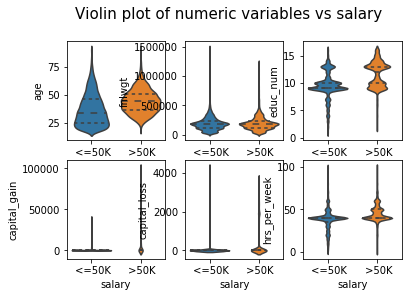

In [7]:
f, axes = plt.subplots(2, 3)
sns.violinplot(y = "age", x = "salary", data = census,  orient = 'v' , ax=axes[0,0], inner = "quartile")
sns.violinplot(y = "fnlwgt", x = "salary", data = census,  orient = 'v' , ax=axes[0,1], inner = "quartile")
sns.violinplot(y = "educ_num", x = "salary", data = census,  orient = 'v' , ax=axes[0, 2], inner = "quartile")
sns.violinplot(y = "capital_gain", x = "salary", data = census,  orient = 'v' , ax=axes[1, 0], inner = "quartile")
sns.violinplot(y = "capital_loss", x = "salary", data = census,  orient = 'v' , ax=axes[1,1], inner = "quartile")
sns.violinplot(y = "hrs_per_week", x = "salary", data = census,  orient = 'v' , ax=axes[1,2], inner = "quartile")

plt.suptitle("Violin plot of numeric variables vs salary", y = 1, fontsize=15)

#### Now, let's display the features separated by "salary" using pairgrid.

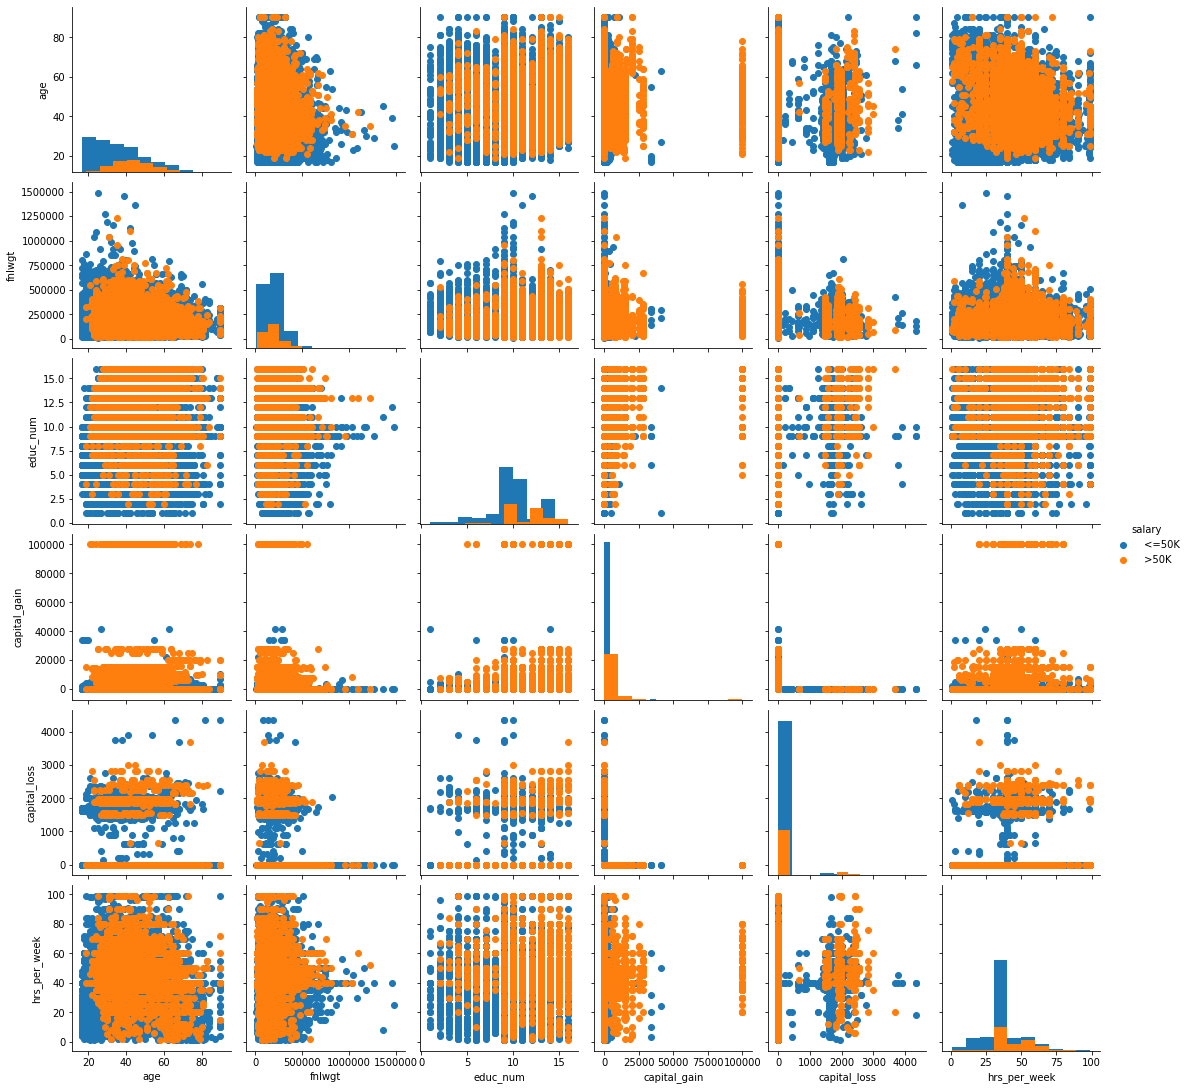

In [8]:
g = sns.PairGrid(census, hue = "salary")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

## Part C: Prepare the Data
#### In this part, we will manipulat the data to prepare for further analysis.

#### Let's begin by separating the numerical and categorical and label variables and print the shape.

In [9]:
X2_num = census.loc[:, ['age','fnlwgt', 'educ_num', 'capital_gain', 'capital_loss', 'hrs_per_week']].values
X2_cat = census.loc[:, ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                        'race', 'sex', 'native_country']].values
y2 = census.loc[:, 'salary'].values

print('Numerical Feature Array Shape:  ', X2_num.shape)
print('Categorical Feature Array Shape:', X2_cat.shape)
print('Label Array Shape:              ', y2.shape)

Numerical Feature Array Shape:   (32561, 6)
Categorical Feature Array Shape: (32561, 8)
Label Array Shape:               (32561,)


#### Now, we will encode the categorical variables with OneHotEncoder to tranform them to suitable format for model building.

In [10]:
encoder_2 = OneHotEncoder(sparse = False)
encoder_2.fit(X2_cat)
X2_enc = encoder_2.transform(X2_cat)

print('Encoded Feature Array Shape:', X2_enc.shape)

Encoded Feature Array Shape: (32561, 102)


#### Here, we will combine the oneHotEncoded categorical variables and numerical variables as featrue variables to be used for analysis.

In [11]:
X2 = np.hstack([X2_num, X2_enc])
print('Feature Array Shape:', X2.shape)

Feature Array Shape: (32561, 108)


#### Here, we will randomly split the data into training and hold by 0.7 : 0.3 ratio and then further split the hold data to validation and test by 0.5 : 0.5. We will use stratified sampling to maintain the proportion of the v

In [12]:
X2_train, X2_hold, y2_train, y2_hold = train_test_split(X2, y2, test_size = 0.3, random_state=1, stratify = y2)
X2_valid, X2_test, y2_valid, y2_test = train_test_split(X2_hold, y2_hold, test_size = 0.5, random_state = 1, 
                                                        stratify = y2_hold)
print('Training Features Shape:  ', X2_train.shape)
print('Validation Features Shape:', X2_valid.shape)
print('Test Features Shape:      ', X2_test.shape)

Training Features Shape:   (22792, 108)
Validation Features Shape: (4884, 108)
Test Features Shape:       (4885, 108)


## Part 5: Build the models:
#### In this part, we will build Logistic Regression Model, Decision Tree Model and Random Forest model.

### Logistic Regression Model:
#### Here, we will create a logistic regression model using the data prepared/transformed above.

In [13]:
lr_mod = LogisticRegression(solver='lbfgs', penalty='none', max_iter = 1000)
lr_mod.fit(X2_train, y2_train)

print('Training Accuracy:  ', round(lr_mod.score(X2_train, y2_train), 4))
print('Validation Accuracy:', round(lr_mod.score(X2_valid, y2_valid), 4))

Training Accuracy:   0.7988
Validation Accuracy: 0.7967


### Decision Tree Model:
#### Here, we will create several decision tree models using the data prepared/transformed above and identify the best among them.

#### Let's begin by building the decision tree model and hypertune the max_depth parameter to identify the optimal model.

In [14]:
dt_train_acc = []
dt_valid_acc = []
depth_range = range(2, 30)

for i in depth_range:
    temp_tree = DecisionTreeClassifier(max_depth = i, random_state = 1)
    temp_tree.fit(X2_train, y2_train)
    dt_train_acc.append(temp_tree.score(X2_train, y2_train))
    dt_valid_acc.append(temp_tree.score(X2_valid, y2_valid))

dt_idx = np.argmax(dt_valid_acc)
dt_opt_depth = depth_range[dt_idx]

print('Optimal value for max_depth:          ', dt_opt_depth)
print('Training Accuracy for Optimal Model:  ', round(dt_train_acc[dt_idx], 4))
print('Validation Accuracy for Optimal Model:', round(dt_valid_acc[dt_idx], 4))

Optimal value for max_depth:           6
Training Accuracy for Optimal Model:   0.8585
Validation Accuracy for Optimal Model: 0.8565


#### Here, we will visually display the training and validation accuracy Vs maximum depth of tree. Line plot below confirms the max depth of the model is 6 as calculated above.

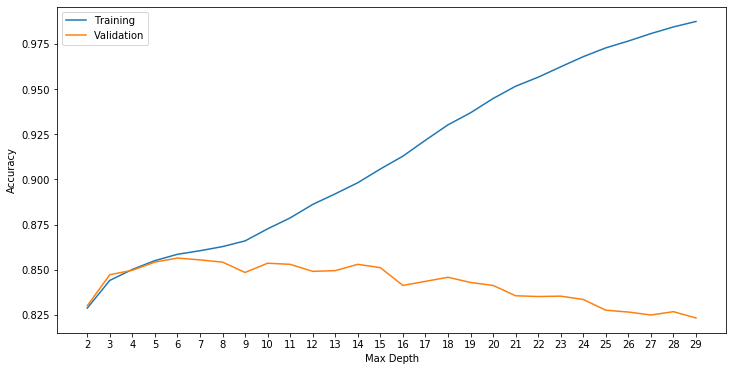

In [15]:
plt.figure(figsize=([12, 6]))
plt.plot(depth_range, dt_train_acc, label='Training')
plt.plot(depth_range, dt_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_range)
plt.legend()

plt.show()

### Random Forest Model:
#### In the section below, we will create several random forest models using the data prepared/transformed above and identify the best among them.

#### Let's begin by building the random forest model and hypertune the max_depth parameter to identify the optimal model.

In [16]:
rf_train_acc = []
rf_valid_acc = []
depth_range = range(2, 30)

for i in depth_range:
    temp_forest = RandomForestClassifier(n_estimators= 100, max_depth= i, random_state=1)
    temp_forest.fit(X2_train, y2_train)
    rf_train_acc.append(temp_forest.score(X2_train, y2_train))
    rf_valid_acc.append(temp_forest.score(X2_valid, y2_valid))

rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = depth_range[rf_idx]

print('Optimal value for max_depth:          ', rf_opt_depth)
print('Training Accuracy for Optimal Model:  ', round(rf_train_acc[rf_idx], 4))
print('Validation Accuracy for Optimal Model:', round(rf_valid_acc[rf_idx], 4))



Optimal value for max_depth:           19
Training Accuracy for Optimal Model:   0.9192
Validation Accuracy for Optimal Model: 0.8643


#### Here, we will visually display the training and validation accuracy Vs maximum depth of tree. Line plot below confirms the max depth of the model is 19 as calculated above.

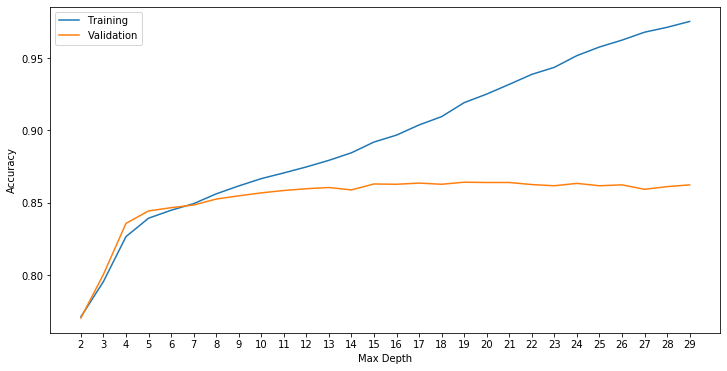

In [17]:
plt.figure(figsize=([12, 6]))
plt.plot(depth_range, rf_train_acc, label='Training')
plt.plot(depth_range, rf_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_range)
plt.legend()

plt.show()

### Part 6: Evaluate Final Model
#### In the section below, we will evaluate different models to identify the final model and display the model performance of the test data using confusion matrix and classification report.

#### Evalaute models to identify the best model.

In [18]:
r2scores = {'Random forest model': rf_valid_acc[rf_idx],'Decision tree model':dt_valid_acc[dt_idx]}

best_model = max(zip(r2scores.values(), r2scores.keys()))[1] # best model is the model with max r2 score.
best_model # as random forest model has the highest r2 score, we will use it as the final model

final_model = RandomForestClassifier(n_estimators= 100, max_depth= rf_opt_depth, random_state = 1)
final_model.fit(X2_train, y2_train)

print('Training Accuracy for Final Model:  ', round(final_model.score(X2_train, y2_train), 4))
print('Validation Accuracy for Final Model:', round(final_model.score(X2_valid, y2_valid), 4))
print('Testing Accuracy for Final Model:   ', round(final_model.score(X2_test, y2_test), 4))

Training Accuracy for Final Model:   0.9192
Validation Accuracy for Final Model: 0.8643
Testing Accuracy for Final Model:    0.8624


#### Now, let's predict the label using the best model as identified above.

In [19]:
final_model = RandomForestClassifier(n_estimators= 100, max_depth= rf_opt_depth, random_state = 1)
final_model.fit(X2_train, y2_train)
test_pred = pd.DataFrame(final_model.predict(X2_test))
test_pred.head()

,0
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


#### Here, we will create the confusion matrix of prediction.

In [20]:
conf_m = confusion_matrix(y2_test, test_pred)

conf_m_df = pd.DataFrame(conf_m,
                     index = ['<=50K', '>50K'],
                     columns = ['<=50K', '>50K'])

conf_m_df

,<=50K,>50K
<=50K,3505,204
>50K,468,708


#### We can also evalaute the quality of model prediction by model classification report.

In [21]:
print(classification_report(y2_test, test_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      3709
        >50K       0.78      0.60      0.68      1176

    accuracy                           0.86      4885
   macro avg       0.83      0.77      0.80      4885
weighted avg       0.86      0.86      0.86      4885



#### We can export the prediction to local drive for future reference.

In [22]:
test_pred.to_excel("salary_prediction.xlsx")